# Sentiment Analysis

In [0]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

In [0]:
sentence = "i really like you but you can be so dumb some times"

## NLTK Vader

In [3]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
sid.polarity_scores(sentence)

{'compound': -0.7154, 'neg': 0.35, 'neu': 0.537, 'pos': 0.113}

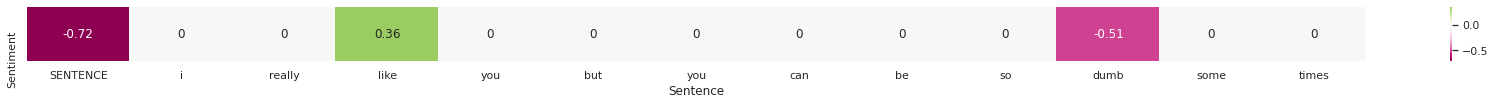

In [5]:
visualise_sentiments({
    "Sentence":["SENTENCE"] + sentence.split(),
    "Sentiment":[sid.polarity_scores(sentence)["compound"]] + [sid.polarity_scores(word)["compound"] for word in sentence.split()]
})

## TextBlob

In [0]:
from textblob import TextBlob

In [7]:
TextBlob(sentence).sentiment

Sentiment(polarity=-0.0875, subjectivity=0.35)

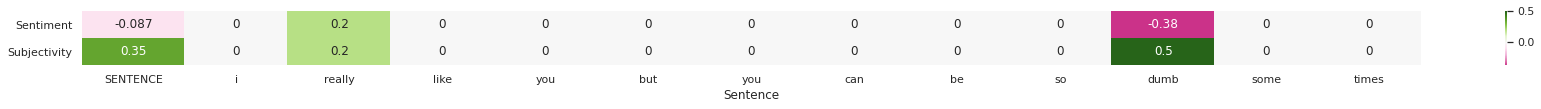

In [8]:
visualise_sentiments({
      "Sentence":["SENTENCE"] + sentence.split(),
      "Sentiment":[TextBlob(sentence).polarity] + [TextBlob(word).polarity for word in sentence.split()],
      "Subjectivity":[TextBlob(sentence).subjectivity] + [TextBlob(word).subjectivity for word in sentence.split()],
})

## Flair

In [9]:
!pip3 install flair
import flair
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

     |████████████████████████████████| 143kB 3.4MB/s 
     |████████████████████████████████| 798kB 11.1MB/s 
     |████████████████████████████████| 256kB 21.0MB/s 
     |████████████████████████████████| 983kB 19.4MB/s 
     |████████████████████████████████| 552kB 24.2MB/s 
     |████████████████████████████████| 1.0MB 34.0MB/s 
     |████████████████████████████████| 3.7MB 41.9MB/s 
     |████████████████████████████████| 870kB 51.0MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-cp36-none-any.whl size=116679 sha256=9a7f309df5fe19c6706ce25d7ce91cc4bdb98bb098496821f948f12eb01543de
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=45a0ff577432d4efcfadef40ed8bc2554a9cde5980002094454b28bb0f8f2528
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
  Created wheel for segtok: fil

100%|██████████| 1501979561/1501979561 [00:55<00:00, 27036089.81B/s]

2020-03-31 04:38:45,784 copying /tmp/tmpigmw98od to cache at /root/.flair/models/imdb-v0.4.pt


2020-03-31 04:38:51,179 removing temp file /tmp/tmpigmw98od
2020-03-31 04:38:51,397 loading file /root/.flair/models/imdb-v0.4.pt


In [10]:
s = flair.data.Sentence(sentence)
flair_sentiment.predict(s)
total_sentiment = s.labels
total_sentiment

[POSITIVE (0.9951706528663635)]

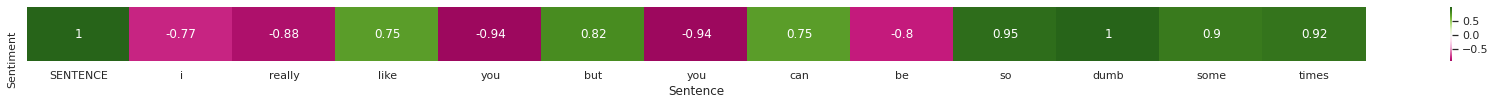

In [11]:
tokens = [token.text for token in s.tokens]
ss = [flair.data.Sentence(s) for s in tokens]
[flair_sentiment.predict(s) for s in ss]
sentiments = [s.labels[0].score * (-1,1)[str(s.labels[0]).split()[0].startswith("POS")] for s in ss]

visualise_sentiments({
      "Sentence":["SENTENCE"] + tokens,
      "Sentiment":[total_sentiment[0].score *(-1,1)[str(total_sentiment[0]).split()[0].startswith("POS")]] + sentiments,
})